# Arbre de décision et ensembling

## Les arbres de décision 

Contrairement à la régression linéaire ou logistique, les arbres de décision n'utilisent pas de paramètre $\theta$ ajustable. 

Un arbre est simplement un empilement de conditions binaires, un peu comme akinator

![exemple_arbre_decision.pn](exemple_arbre_decision.png)[exemple_arbre_decision.png]


In [ ]:
def predict_simple_tree(X):
    
    poids = X[0]
    
    if poids > 120: 
        return True
    else: 
        taille = X[1]
        if taille > 190:
            return False
        else:
            return True
        
        
X = [110, 155]

heart_risk = predict_simple_tree(X)
print(heart_risk)
    

True


La question alors c'est comment trouver les questions à poser ? 

L'idée est de trouver la question qui va permettre de séparer un groupe en deux sous groupe le plus homogène possible

Supposons qu'on veuille faire de la classification de risque cardiaque. On dispose d'un dataset avec la taille, le poids et le risque. On a le choix entre poser des questions sur le poisd ou sur la taille. 

![decision_tree.png](decision_tree.png)

Utiliser la question du poids, permet de mieux séparer les personnes à risque des personnes qui ne le sont pas : les sous groupes sont plus homogène. 

On va donc choisir d'utiliser le poids comme question à poser. Bien sur il est tout à fait possible de poser la question de la taille pour le groupe qui n'est pas complétement trié. 

Sklearn propose bien sur des classes pour les arbres de décision (pour la classification et la régression)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3)

X = df[['size', 'nb_room']]
#astuce : on récupère toutes les colonnes sauf le label
X = df.drop(columns=['soldinsixmonth'])


y = df['soldinsixmonth']
model.fit(X, y) #dans le fit : la magic happens : pendant l'entraînement les questions binaires sont choisies

DecisionTreeClassifier(max_depth=3)

In [ ]:
predictions = model.predict(X) #pas besoin du y : pas besoin des labels pour faire les prédictions
print(predictions) 

[0 1 0]


[Text(167.4, 163.07999999999998, 'nb_room <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

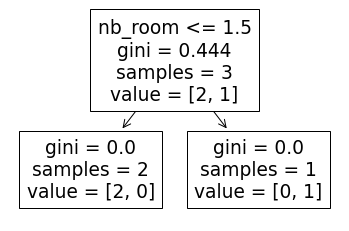

In [ ]:
plot_tree(model, feature_names=df.columns.values)

## Ensembling

L'ensembling consiste à combiner plusieurs modèles afin d'avoir des performances plus élevées que chaque modèle individuel. C'est un peu comme le principe de la sagesse de la foulle. 

Il existe trois principales méthodes combiner plusieurs modèles ensemble


1. Bagging (bootstrap aggregation)
2. Boosting
3. Stacking


### bagging

Le bagging consiste à générer plusieurs dataset de train à partir du dataset de train original en utilisant de l'échantillonage avec remise. Sur chacun des dataset

![bagging.png](bagging.png)

## le boosting 

Contrairement au bagging, chaque modèle de l'ensemble est entraîné sur le même dataset. 


![boosting.png](boosting.png)

Pour combiner les prédictions, il y a plusieurs manières selon qu'on fasse de la régression ou de la classification




In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # il faut imaginer qu'à l'interieur il y 100 arbre de déisions différents
model.fit(X, y) # entraîîne 100 arbre de décision différentb
model.predict(X)

array([0, 1, 0])

## Exemple de stacking en python 

Le stacking consiste à faire un modèle de modèle. On entraîne les modèles de notre ensemble. 

Puis on va entraîner un modèle supplémentaire qui utilisera en feature les prédictions des modèles de l'ensemble

On peut voir les réseaux de neurones comme du stacking de neurone (on en reparlera)


In [ ]:
import pandas as pd
train = pd.DataFrame({
    'taille': [0.1, 0.3, 0.5],
    'cancerous': [0, 1, 1]
})


Entraînons trois modèles

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model1 = DecisionTreeClassifier()
model1.fit(train[['taille']], train['cancerous'])

model2 = LogisticRegression()
model2.fit(train[['taille']], train['cancerous'])

model3 = GaussianNB()
model3.fit(train[['taille']], train['cancerous'])


GaussianNB()

Une fois que les modèles sont entraînés, calculons leur prédictions et utilisons cela pour générer un nouveau dataset

In [ ]:
pred_model1 = model1.predict(train[['taille']])
pred_model2 = model2.predict(train[['taille']])
pred_model3 = model3.predict(train[['taille']])

train_2 = pd.DataFrame({
    'pred1': pred_model1,
    'pred2': pred_model2,
    'pred3': pred_model3
})
train_2

,pred1,pred2,pred3
0,0,1,0
1,1,1,1
2,1,1,1


Utilisons ce dataset de prediction pour entraîner un nouveau modèle qui doit prédire si la tumeur est cancereuse à partir des prédictions de chaque modèle

In [ ]:
model_combinant = DecisionTreeClassifier()

model_combinant.fit(train_2, train['cancerous'])

model_combinant.predict(train_2)

array([0, 1, 1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25ad01f7-ec4b-4ac8-bce6-a3745ef02c96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>